# TF2202 Teknik Komputasi - Interpolasi

Fadjar Fathurrahman

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
%matplotlib inline

In [3]:
import matplotlib
matplotlib.style.use("dark_background")
#matplotlib.style.use("default")

## Polinomial Lagrange

Polinomial Lagrange didefinisikan sebagai:
$$
P_n(x) = \sum_{i=0}^{n} y_{i} L_{i}(x)
$$
Polinomial ini adalah interpolant yang memiliki derajat $n$ dan melewati $(n+1)$ titik data atau pasangan $(x_{i},y_{i})$ dan $L_{i}(x)$ adalah fungsi polinomial dengan bentuk:
$$
L_{i}(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n}
\frac{x - x_{j}}{x_{i} - x_{j}}
$$

Catatan: pada buku Kiusalaas persamaan ini typo. Pada buku Chapra, syarat hasil kali juga memiliki typo.

Sebagai contoh, diberikan data sebagai berikut:

| $x_{i}$ | $y_{i}$             |
| ------- | ------------------ |
| 1       | 0                  |
| 4       | 1.386294 |
| 6       | 1.791760 |


In [6]:
x = np.array([1.0, 4.0, 6.0])
y = np.array([0, 1.386294, 1.791760])

In [44]:
def lagrange_interp(x, y, xx):
    
    assert len(x) == len(y)
    
    # Jumlah data adalah N + 1 dan derajat polynomial adalah N
    # atau:
    # Jumlah data adalah N dan derajat polynomial adalah N - 1
    N = len(x) - 1

    yy = 0.0
    for i in range(N+1):
        # Evaluasi fungsi kardinal
        Li = 1.0 # inisialisasi ke ke 1.0
        for j in range(N+1):
            if i != j:
                Li = Li * (xx - x[j])/(x[i] - x[j])
        yy = yy + y[i]*Li
    return yy

In [45]:
lagrange_interp(x, y, 2.0)

0.5658439999999999

In [46]:
NptsPlot = 1000
xx = np.linspace(x[0], x[-1], NptsPlot)
yy = np.zeros(NptsPlot)
for i in range(NptsPlot):
    yy[i] = lagrange_interp(x, y, xx[i])

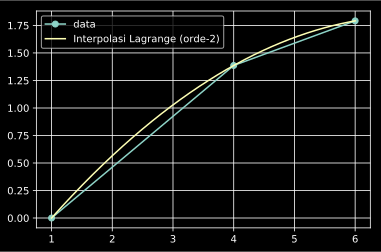

In [50]:
plt.clf()
plt.plot(x, y, marker="o", label="data")
plt.plot(xx, yy, label="Interpolasi Lagrange (orde-2)")
plt.grid()
plt.legend()

## Polinomial Newton

Polinomial Newton memiliki bentuk sebagai berikut:
$$
P_{n} = a_{0} + (x - x_{0}) a_{1} + (x - x_{0}) (x - x_{1}) a_{2} + \cdots
+ (x - x_{0})(x - x_{1}) \cdots (x - x_{n-1}) a_{n}
$$
Koefisien $a_{n}$ dapat dihitung dengan:
$$
\begin{align*}
a_{0} & = f(x_0) \\
a_{1} & = f[x_1,x_0] \\
a_{2} & = f[x_2, x_1, x_0] \\
\vdots \\
a_{n} & = f[x_n, x_{n-1}, \ldots, x_1, x_0]
\end{align*}
$$
di mana fungsi dengan tanda kurung siku merupakan beda terbagi hingga (*finite divided differences*).

Beda terbagi hingga pertama didefinisikan sebagai:
$$
f[x_{i},x_{j}] = \frac{f(x_i) - f(x_j)}{x_i - x_j}
$$
Beda terbagi hingga kedua didefinisikan sebagai:
$$
f[x_{i},x_{j},x_{k}] = \frac{f[x_{i},x_{j}] - f[x_{j},f_{k}]}{x_i - x_k}
$$
Secara umum, untuk beda terbagi hingga ke-$n$ adalah:
$$
f[x_{n},x_{n-1},\ldots,x_{1},x_{0}] =
\frac{f[x_{n},x_{n-1},\ldots,x_{1}]
- f[x_{n-1},x_{n-2},\ldots,x_{0}] }{x_n - x_0}
$$

In [5]:
x = np.array([1.0, 4.0, 6.0])
y = np.array([0, 1.386294, 1.791760])

In [ ]:
def hitung_beda_hingga_1(x, y)

In [52]:
y[1] - y[0]/(x[1] - x[0])

1.386294

In [ ]:
y[2] - y[1]/(x[1] - x[0])

In [42]:
def create_newton_polynom(x, y):
    Ndata = len(x) # jumlah data
    coefs = np.copy(y)
    for k in range(1,Ndata):
        coefs[k:Ndata] = (coefs[k:Ndata] - coefs[k-1])/(x[k:Ndata] - x[k-1])
    return coefs

def eval_newton_polynom(coefs, x, xo):
    N = len(x) - 1 # derajat polinom
    p = coefs[N]
    for k in range(1,N+1):
        p = coefs[N-k] + (xo - x[N-k])*p
    return p

In [43]:
x = np.array([1.0, 4.0, 6.0])
y = np.array([0, 1.386294, 1.791760])

In [44]:
coefs = create_newton_polynom(x, y)
coefs

array([ 0.      ,  0.462098, -0.051873])

In [13]:
eval_newton_polynom(coefs, x, 2.0)

0.5658439999999999

## Tes fungsi cos

In [39]:
def func_01(x):
    return np.cos(2*x)

In [45]:
N = 5
A = 0.0
B = 2*np.pi
x_sample = np.linspace(A, B, N)
y_sample = func_01(x_sample)

NptsPlot = 500
x_dense = np.linspace(A,B,NptsPlot)
y_dense = func_01(x_dense)

Ninterp = 10
x_interp = np.linspace(A,B,Ninterp)
y_interp = func_01(x_interp)
coefs = create_newton_polynom(x_interp, y_interp)

x_interp_plt = np.linspace(A,B,NptsPlot)
y_interp_plt = np.zeros(NptsPlot)
for i in range(NptsPlot):
    y_interp_plt[i] = eval_newton_polynom(coefs, x_interp, x_interp_plt[i])

In [15]:
x_sample, y_sample

(array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531]),
 array([ 1.0000000e+00,  6.1232340e-17, -1.0000000e+00, -1.8369702e-16,
         1.0000000e+00]))

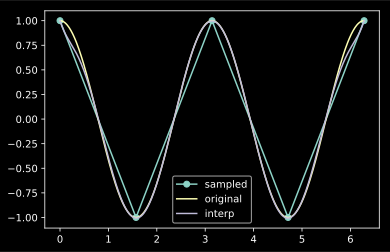

In [46]:
plt.clf()
plt.plot(x_sample, y_sample, marker="o", label="sampled")
plt.plot(x_dense, y_dense, label="original")
plt.plot(x_interp_plt, y_interp_plt, label="interp")
plt.legend()

## Metode Neville

In [55]:
## module neville
def neville_interp(x, y_, xx):
    m = len(x)
    y = np.copy(y_)
    for k in range(1,m):
        y[0:m-k] = ((xx- x[k:m])*y[0:m-k] + (x[0:m-k] - xx)*y[1:m-k+1])/(x[0:m-k] - x[k:m])
        #y[0:m-k] = (xx- x[k:m])*y[0:m-k] + (x[0:m-k] - xx)*y[1:m-k+1]
    return y[0]

In [56]:
x = np.array([1.0, 4.0, 6.0])
y = np.array([0, 1.386294, 1.791760])
neville_interp(x, y, 2.0)

0.5658439999999999